# Assignment 2a Due

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [1]:
#your import cell
import numpy as np
import math as m
import scipy as sc
import matplotlib.pyplot as plt

Now we can define our integration algorithms

In [2]:
#define midpoint rule
def midpoint(f, n: int, a: float, b: float):
    '''Calculates area under curve with Riemann Sum Approximation through the midpoint rule.'''
    if a >= b:
        print("b must be larger than a")
    else:
        dx = float((b - a) / n)
        s = a + .5 * dx #First midpoint
        sum = 0
        for i in range(n):
            sum += dx * f(s + i * dx)
        return sum

In [3]:
#define trapazoidal rule
def trapezoid(f, n: int, a: float, b: float):
    '''Calculates area under curve with Riemann Sum Approximation through the trapazoidal rule.'''
    if a >= b:
        print("b must be larger than a")
    else:
        dx = float((b - a) / n)
        sum = f(a) + f(b)
        for i in range(1,n-1):
            sum += 2 * f(a + i * dx)
        sum *= (dx / 2)
        return sum

In [15]:
#define simpson's rule
def simpson(f, n: int, a: float, b: float):
    '''Calculates area under curve with Riemann Sum Approximation through simpson's rule.'''
    if a >= b or n % 2 != 0:
        print("b must be larger than a and n must be even")
    else:
        dx = float((b - a) / n)
        sum = 0
        for i in range(n):
            if i == 0 or i == n:
                sum += f(a + i * dx)
            elif i % 2 != 0:
                sum += 4 * f(a + i * dx)
            elif i % 2 == 0:
                sum += 2 * f(a + i * dx)
        sum *= (dx / 3)
        return sum

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

# Question
Have you seen an integral like this before in physics? From where?

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

# Question
What is the exact solution?

In [12]:
#exact solution to the integral
exact_solution = .3535533906

In [18]:
#solve the integral using your integration functions
my_mid = midpoint(lambda x: 2 / ((2**2 + x**2)**1.5), 6, 0, 2)
my_trap = trapezoid(lambda x: 2 / ((2**2 + x**2)**1.5), 6, 0, 2)
my_simp = simpson(lambda x: 2 / ((2**2 + x**2)**1.5), 6, 0, 2)

Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [8]:
#scipy integration
scipy_trap = sc.trapz(lambda x: 2 / ((2**2 + x**2)**1.5), x, 1/3)
scipy_simp = sc.simps(lambda x: 2 / ((2**2 + x**2)**1.5), x, 1/3)

ValueError: diff requires input that is at least one dimensional

# Question
How do scipy integrals compare to yours? Support your answer. 

In [ ]:
#print the numerical values
print("My trapazoidal rule: {0}\nSciPy's trapazoidal rule: {1}\n\nMy Simpson's rule: {2}\nSciPy's Simpson's rule: {3}".format(my_trap,scipy_trap,my_simp,scipy+simp))

Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [23]:
#numerical comparisons
def per_diff(approx: float, exact: float):
    '''Calculates the percent difference between two values'''
    answer = abs((approx - exact) / exact) * 100
    return answer
print("Midpoint: {}%".format(per_diff(my_mid, exact_solution)))
print("Trapezoid: {}%".format(per_diff(my_trap, exact_solution)))
print("Simpson: {}%".format(per_diff(my_simp, exact_solution)))

Midpoint: 0.08671529298903767%
Trapezoid: 10.859694635409578%
Simpson: 2.778230319149583%


# Question
Which method provides the best approximation to the exact solution?

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

<BarContainer object of 3 artists>

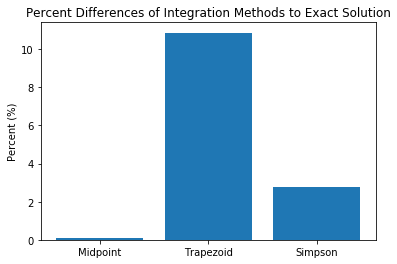

In [26]:
#plot
percent_differences = np.array([per_diff(my_mid,exact_solution),per_diff(my_trap,exact_solution),per_diff(my_simp,exact_solution)])
plt.figure()
plt.title("Percent Differences of Integration Methods to Exact Solution")
plt.ylabel("Percent (%)")
plt.bar(np.array(["Midpoint", "Trapezoid", "Simpson"]), percent_differences)


Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [ ]:
#solve integral above


# Question
If you square your solution, does the resulting number have any special meaning?